<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/python/HSVSegmetnation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


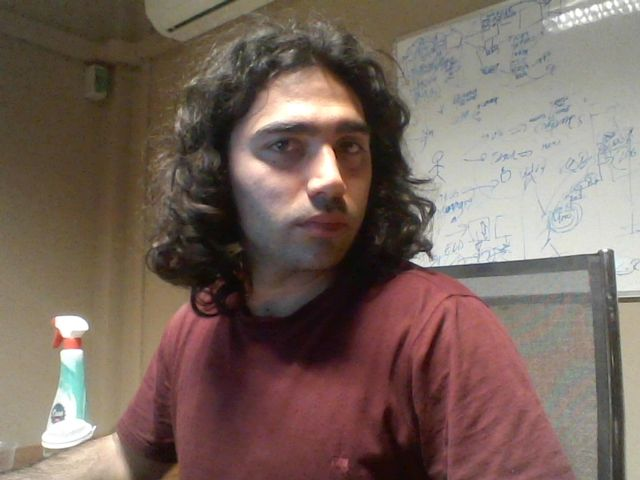

In [3]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [6]:
from numpy.core.multiarray import vdot
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact

hl = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Hue:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
sl = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Saturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
vl = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
hd = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Hue:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
sd = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Saturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
vd = widgets.IntSlider(
    value=7,
    min=0,
    max=255,
    step=1,
    description='Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#display( widgets.VBox([ widgets.HBox([hl,sl,vl]), widgets.HBox([hd,sd,vd])]) )

def f(hl,sl,vl,hd,sd,vd):

  filename =  "photo.jpg"

  # cv2.IMREAD_COLOR --> BGR
  im = cv2.imread(filename, cv2.IMREAD_COLOR) # cv2.IMREAD_GRAYSCALE, cv2.IMREAD_UNCHANGED
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # RGB
  imhsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV) # RGB
  #imhsv = cv2.resize(im, (120,120))

  light_orange = (hl, sl, vl)
  dark_orange = (hd, sd, vd)
  mask = cv2.inRange(imhsv, light_orange, dark_orange)
  result = cv2.bitwise_and(im, im, mask=mask)

  # visualizzare
  im_pil = Image.fromarray(result)
  display(im_pil) # RGB
  display(Image.fromarray(im))

d = interact(f,hl=hl,sl=sl,vl=vl,hd=hd,sd=sd,vd=vd)

interactive(children=(IntSlider(value=7, continuous_update=False, description='Hue:', max=255), IntSlider(valu…